### Setup

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import os
import seaborn as sns
from datetime import datetime


### Creating datapaths

In [104]:
path= r"G:\Meu Drive\Meu projeto\csv_analise\top\aversivo\Fidel_d23_teste_snake_eletro_1DLC_resnet50_after_surgery_networkNov18shuffle1_300000.csv"
df = pd.read_csv(path, header=[1, 2])

video_path = r"G:\Meu Drive\Meu projeto\csv_analise\top\aversivo\Fidel_d23_teste_snake_eletro_1.mp4"
cap = cv2.VideoCapture(video_path) 

stim_timestamps = r"G:\Meu Drive\Meu projeto\csv_analise\top\aversivo\Fidel_d23_teste_snake_eletro_stim_ON_OFF_timestamps.csv"
stim_df = pd.read_csv(stim_timestamps, header=[0])

### Dataframe segmentation

##### Stim window

In [ ]:
stim_on = stim_df[('stim_ON')].values
stim_off = stim_df[('stim_OFF')].values

fps = 30

lista_de_segmentos = []

for i in range(len(stim_on)):
    start_sec = stim_on[i]
    end_sec = stim_off[i]

    start_frame = start_sec * fps
    end_frame = end_sec * fps

    segmento_atual = df[(df.index >= start_frame) & (df.index <= end_frame)]
    
    lista_de_segmentos.append(segmento_atual)

df_seg_stim = pd.concat(lista_de_segmentos)

bodyparts        nose                               head              \
         coords           x           y likelihood           x           y   
5401       5401  418.329193  202.998810   0.123018  444.524719  200.073502   
5402       5402  419.013336  206.865875   0.111372  445.070129  200.144623   
5403       5403  418.815643  206.689453   0.101492  444.965576  200.275009   
5404       5404  418.579163  206.947678   0.085831  445.267609  200.412628   
5405       5405  418.944763  213.313950   0.989083  464.514679  199.532425   
...         ...         ...         ...        ...         ...         ...   
20396     20396  406.085266  193.994278   0.999564  458.704285  200.876724   
20397     20397  407.104462  194.820068   0.999576  490.084137  195.682358   
20398     20398  408.224640  195.092514   0.999505  488.717316  195.862534   
20399     20399  408.548370  195.417618   0.999528  481.531219  196.616562   
20400     20400  409.347198  195.371170   0.999250  472.852875  194.563934   

                        body                        left_window              \
      likelihood           x           y likelihood           x           y   
5401    0.999252  540.045105  182.109970   0.989230   82.987198  334.715363   
5402    0.999106  540.064209  182.462708   0.991198   82.938820  334.858490   
5403    0.999073  539.883911  182.315292   0.991572   82.827675  335.147461   
5404    0.998964  539.717102  182.150879   0.991401   82.789459  335.140106   
5405    0.998745  536.984924  180.823105   0.988287   83.076965  335.764648   
...          ...         ...         ...        ...         ...         ...   
20396   0.944214  531.605225  181.260147   0.996600   83.265831  333.449921   
20397   0.934031  532.130249  181.286057   0.996533   83.661438  334.068085   
20398   0.945480  532.839600  181.238846   0.996412   83.018669  333.078491   
20399   0.975277  532.916199  181.830688   0.995723   83.514336  333.583832   
20400   0.983980  534.260193  181.812424   0.993953   83.004181  333.627350   

                 right_window                         
      likelihood            x           y likelihood  
5401    0.997962    75.438889  162.703934   0.999452  
5402    0.998156    75.573822  162.654922   0.999460  
5403    0.998310    75.552223  162.707245   0.999481  
5404    0.998305    75.441391  162.787964   0.999507  
5405    0.998042    75.401894  162.945541   0.999509  
...          ...          ...         ...        ...  
20396   0.998566    75.429337  162.239334   0.999451  
20397   0.998315    75.432030  162.263718   0.999454  
20398   0.998628    75.725830  162.214172   0.999464  
20399   0.998698    75.449158  162.268921   0.999436  
20400   0.998628    75.943367  161.979599   0.999432  

[600 rows x 16 columns]

##### All video

In [107]:
df_seg_stim = df

### Box area selection

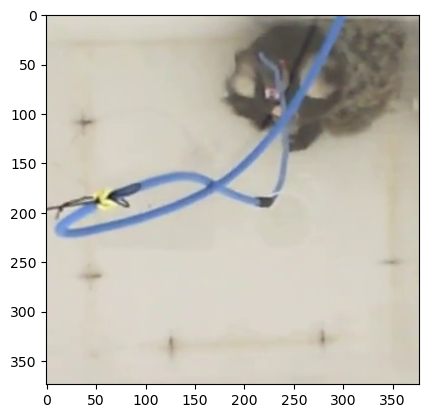

In [72]:
cap = cv2.VideoCapture(video_path) 
numOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
chosenFrameIdx = np.random.randint(1, high=numOfFrames)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 700
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

roi_small = cv2.selectROI('Select the arena, then press space and enter', frame_for_selection) 

x_scale = original_width / display_max_width
y_scale = original_height / display_height

roi_original_scale = (
    int(roi_small[0] * x_scale),
    int(roi_small[1] * y_scale),
    int(roi_small[2] * x_scale),
    int(roi_small[3] * y_scale)
)

roi_cropped = chosenFrame[int(roi_original_scale[1]):int(roi_original_scale[1]+roi_original_scale[3]), int(roi_original_scale[0]):int(roi_original_scale[0]+roi_original_scale[2])]
plt.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()

arenaSide = (roi_original_scale[2] + roi_original_scale[3]) / 2 
xThresholdLeft = roi_original_scale[0]
xThresholdRight = roi_original_scale[0] + arenaSide
yThresholdUp = roi_original_scale[1]
yThresholdDown = roi_original_scale[1] + arenaSide

### Convert pixel to cm

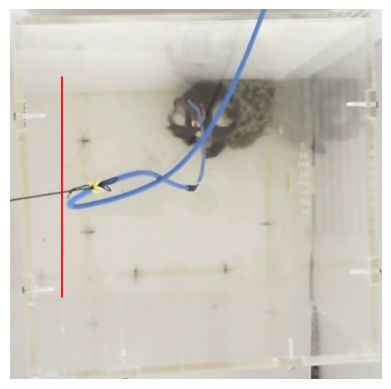

Pixels per cm: 14.442307692307692


In [102]:
py1 = yThresholdDown 
py2 = yThresholdUp
px = xThresholdLeft

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, (px, int(py1)), (px, int(py2)), (0, 0, 255), 2)  
frame_with_line_rgb = cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(frame_with_line_rgb)
plt.axis('off') 
plt.show()

pix_per_cm = (py1-py2) / 26 # 26 cm é a distância entre os dois pontos
print(f"Pixels per cm: {pix_per_cm}")

### Filter coordinates

In [108]:
body_x = df_seg_stim[('body', 'x')].values
body_y = df_seg_stim[('body', 'y')].values
head_x = df_seg_stim[('head', 'x')].values
head_y = df_seg_stim[('head', 'y')].values
nose_x = df_seg_stim[('nose', 'x')].values
nose_y = df_seg_stim[('nose', 'y')].values

body_x_filt = np.where((body_x >= xThresholdLeft) & (body_x <= xThresholdRight), body_x, np.nan)    
body_y_filt = np.where((body_y >= yThresholdUp) & (body_y <= yThresholdDown), body_y, np.nan)
head_x_filt = np.where((head_x >= xThresholdLeft) & (head_x <= xThresholdRight), head_x, np.nan)
head_y_filt = np.where((head_y >= yThresholdUp) & (head_y <= yThresholdDown), head_y, np.nan)
nose_x_filt = np.where((nose_x >= xThresholdLeft) & (nose_x <= xThresholdRight), nose_x, np.nan)
nose_y_filt = np.where((nose_y >= yThresholdUp) & (nose_y <= yThresholdDown), nose_y, np.nan)

body_x_cm = body_x_filt / pix_per_cm
body_y_cm = body_y_filt / pix_per_cm
head_x_cm = head_x_filt  / pix_per_cm
head_y_cm = head_y_filt  / pix_per_cm
nose_x_cm = nose_x_filt  / pix_per_cm
nose_y_cm = nose_y_filt  / pix_per_cm

mask_combined = (
    ~np.isnan(body_x_cm) & 
    ~np.isnan(body_y_cm) &
    ~np.isnan(head_x_cm) & 
    ~np.isnan(head_y_cm) &
    ~np.isnan(nose_x_cm) & 
    ~np.isnan(nose_y_cm)
)

body_x = body_x_cm[mask_combined]
body_y = body_y_cm[mask_combined]
head_x = head_x_cm[mask_combined]
head_y = head_y_cm[mask_combined]
nose_x = nose_x_cm[mask_combined]
nose_y = nose_y_cm[mask_combined]

body_x = pd.Series(body_x).rolling(window=59, min_periods=1, center=True).mean().values
body_y = pd.Series(body_y).rolling(window=59, min_periods=1, center=True).mean().values

head_x = pd.Series(head_x).rolling(window=59, min_periods=1, center=True).mean().values
head_y = pd.Series(head_y).rolling(window=59, min_periods=1, center=True).mean().values
nose_x = pd.Series(nose_x).rolling(window=59, min_periods=1, center=True).mean().values
nose_y = pd.Series(nose_y).rolling(window=59, min_periods=1, center=True).mean().values

### Polar plot config

In [109]:
dx = nose_x - head_x
dy = nose_y - head_y

angles_rad = np.arctan2(dy, dx)
angles_deg = (np.degrees(angles_rad) + 360) % 360

bin_size = 20 
bins = np.arange(0, 361, bin_size)
counts, bin_edges = np.histogram(angles_deg, bins=bins)
bin_centers_deg = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
theta = np.deg2rad(bin_centers_deg)

radii = counts
width = np.deg2rad(bin_size)
colors = plt.cm.viridis(radii / np.max(radii))

### Plot and save

In [110]:
figures_to_save = {}

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
animal_name = 'Fiona'
condition = 'aversive'

filename1 = f'histograma_{animal_name}_{condition}_{timestamp}.png'
filename2 = f'heatmap_{animal_name}_{condition}_{timestamp}.png'
filename3 = f'tracking_{animal_name}_{condition}_{timestamp}.png'
filename4 = f'polar_{animal_name}_{condition}_{timestamp}.png'
filename5 = f'direction_{animal_name}_{condition}_{timestamp}.png'

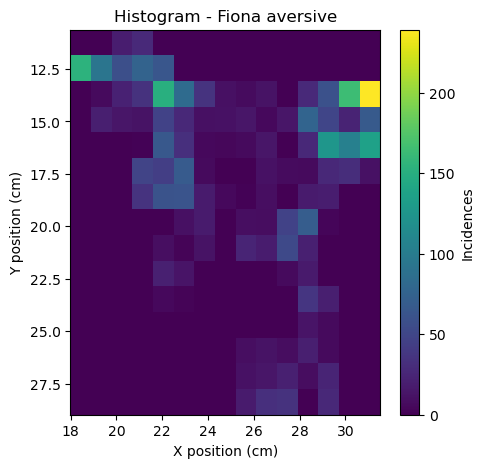

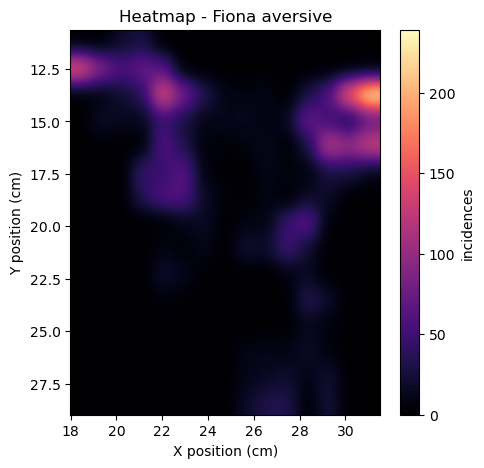

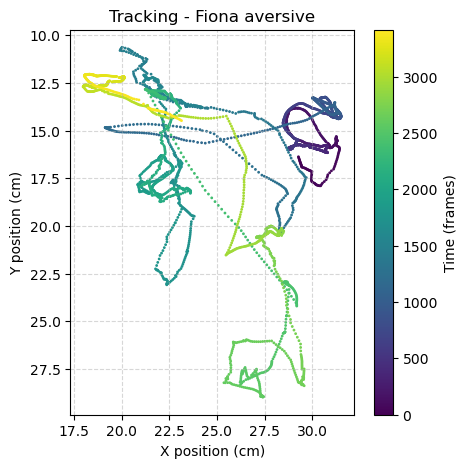

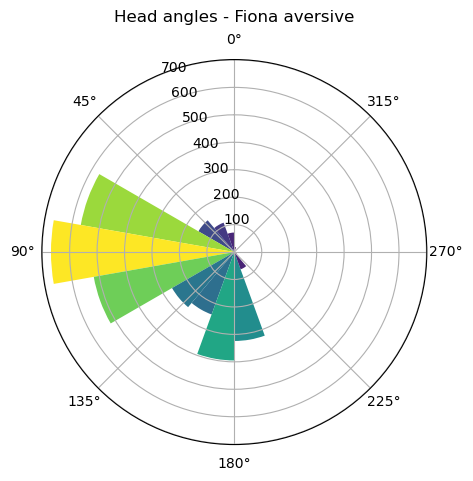

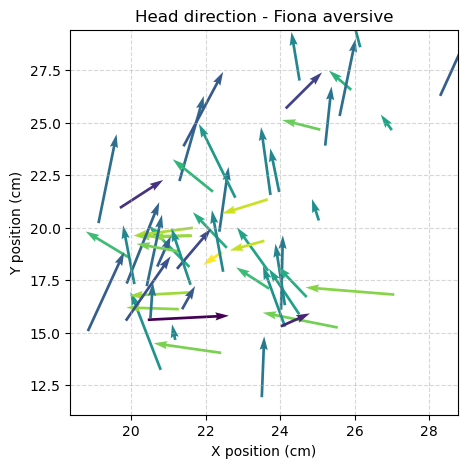

In [111]:
xmin = 13 
xmax = 23
ymin = 27  
ymax = 12
xlim = [xmin, xmax]
ylim = [ymin, ymax]

fig1, ax1 = plt.subplots(figsize=(5, 5))
mappable = ax1.hist2d(body_x, body_y, bins=15)[3]
ax1.set_title('Histogram - ' + animal_name +' '+ condition)
ax1.set_xlabel('X position (cm)')
ax1.set_ylabel('Y position (cm)')
#ax1.set_xlim(xlim)
#ax1.set_ylim(ylim)
fig1.colorbar(mappable, ax=ax1, label='Incidences')
ax1.invert_yaxis()
figures_to_save[filename1] = fig1

fig2, ax2 = plt.subplots(figsize=(5, 5))
h, xedges, yedges = np.histogram2d(body_x, body_y, bins=15)
im = ax2.imshow(h.T, origin='lower', cmap='magma',
               interpolation='gaussian',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', vmin=0, vmax=np.max(h))
fig2.colorbar(im, ax=ax2, label='incidences', orientation='vertical', shrink=1.0)
ax2.set_title('Heatmap - ' + animal_name +' '+ condition)
ax2.set_xlabel('X position (cm)')
ax2.set_ylabel('Y position (cm)')
#ax2.set_xlim(xlim)
#ax2.set_ylim(ylim)
ax2.invert_yaxis()
figures_to_save[filename2] = fig2

fig3, ax3 = plt.subplots(figsize=(5, 5))
time = np.arange(len(body_x))
scatter = ax3.scatter(body_x, body_y, c=time, s=1, cmap='viridis')
fig3.colorbar(scatter, ax=ax3, label='Time (frames)')
ax3.set_title('Tracking - ' + animal_name +' '+ condition)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.set_xlabel('X position (cm)')
ax3.set_ylabel('Y position (cm)')
#ax3.set_xlim(xlim)
#ax3.set_ylim(ylim)
ax3.set_aspect('equal', adjustable='box')
ax3.invert_yaxis()
figures_to_save[filename3] = fig3

fig4, ax4 = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
ax4.bar(theta, radii, width=width, bottom=0.0, color=colors)
ax4.set_theta_zero_location('N')  
ax4.set_theta_direction(1)     
ax4.set_title('Head angles - ' + animal_name +' '+ condition, va='bottom')
plt.show()
figures_to_save[filename4] = fig4

fig5, ax5 = plt.subplots(figsize=(5, 5))
f = 60
ax5.quiver(head_x[::f], head_y[::f],
           dx[::f], dy[::f],
           angles_deg[::f], scale=20, cmap='viridis', width=0.007)
ax5.set_title('Head direction - ' + animal_name +' '+ condition)
ax5.set_xlabel('X position (cm)')
ax5.set_ylabel('Y position (cm)')
ax5.grid(True, linestyle='--', alpha=0.5)
plt.show()
figures_to_save[filename5] = fig5

In [148]:
folder_name = animal_name +' '+ condition
os.makedirs(folder_name, exist_ok=True)

for filename, fig_object in figures_to_save.items():
        full_path = os.path.join(folder_name, filename)

        fig_object.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"- Figura '{filename}' salva com sucesso.")

- Figura 'histograma_Fiona_aversive_2025-07-03_14-35.png' salva com sucesso.
- Figura 'heatmap_Fiona_aversive_2025-07-03_14-35.png' salva com sucesso.
- Figura 'tracking_Fiona_aversive_2025-07-03_14-35.png' salva com sucesso.
- Figura 'polar_Fiona_aversive_2025-07-03_14-35.png' salva com sucesso.
- Figura 'direction_Fiona_aversive_2025-07-03_14-35.png' salva com sucesso.
